# Assignment \# VI:  KNN

## Problem statement

In this project, we will use the $\texttt{Labeled Faces in the Wild (LFW)}$ dataset, designed for studying face verification and identification, fetched from ```sklearn.datasets.fetch_lfw_people```. It provides lots of images of faces collected from the web. To crop the images of faces, the dataset uses the Viola-Jones face detector. Let’s first visualize images in the $\texttt{LFW}$ dataset. For more details, please refer to the description below.

In [ ]:
from KNN import *

In [4]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
print(faces['DESCR']) # description

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

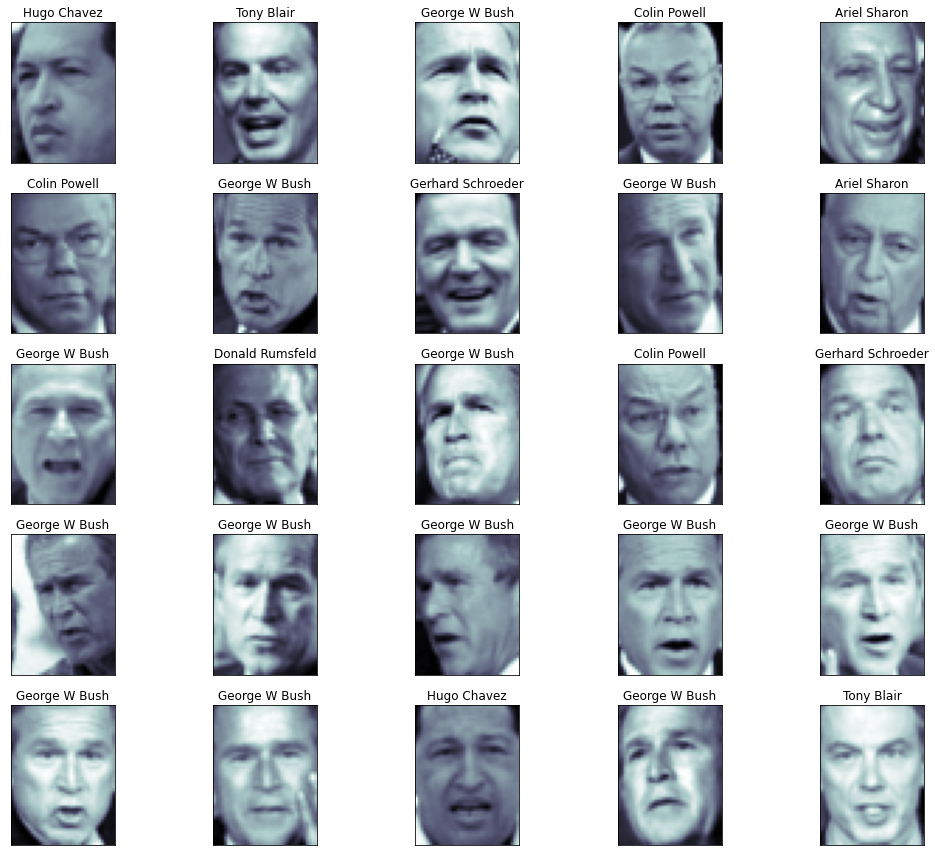

In [6]:
fig = plt.figure(figsize=(15, 12))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
    name = faces.target_names[faces.target[i]]
    ax.set_title(name)
plt.tight_layout()
plt.show()

Let’s apply a $\texttt{weighted k-NN classifier}$ to identify persons with the $\texttt{Labeled Faces in the Wild}$ dataset.

**NOTE**: To implement the $\texttt{k-NN classifier}$, exploiting ```sklearn.neighbors``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. Weighted k-NN Classifier

P1.1 Implement a weighted knn classifier (the ```KNN_Classifier``` class) using a kernel function, where we use **Euclidean distances** between intensity values, to measure the similarity of two images. Detailed descriptions are in the following. *(60 points)*  
> **Distance metric**: Euclidean distances between intensities, $d(\mathbf{x}, \mathbf{y}) = \sqrt {\left( {x_1 - y_1 } \right)^2 + \left( {x_2 - y_2 } \right)^2 + \cdots + \left( {x_n - y_n } \right)^2 }$, where we denote by $x_i$ and $y_i$, $i\in\{1,\dots,n\}$ intensity values of the images $\mathbf{x}$ and $\mathbf{y}$, respectively. $n$ is the total number of pixels in the image.
>
> **Kernel functions**
>> **Uniform kernel** : $\mathcal{K}(d) = 1 $  
>> **Inverse kernel** : $\mathcal{K}(d) = \bigg\{ \begin{array}{ll} \frac{1}{d} & (d \neq 0) \\ 1 & (d = 0) \end{array} $   
>> **Gaussian kernel** : $\mathcal{K}(d, \lambda) = e^{\frac{-d^2}{\lambda}} $
>
> **Prediction** : The most common value in K-nearest neighbors


In **P1.1**, we use inntensity values of an image as features for the knn classifier. However, in practice, the distances between intensity values are not discriminative enough to differenciate identities of persons. To address this problem, we will use the **eigenface** to extract features for face images.

The **eigenface** is a very popular method for face recognition in computer vision. The eigenface representation provides a set of eigenvercotors (i.e., basis functions) for face images. This suggests that we can represent an arbtrary face image as a linear combination of the eigenvercotors and corresponding coefficients. The engenface representations could also be used to compress face images by representing them using the eigenface representations, discarding eigenvectors with small coefficients, and reconstructing the face images with limited eigenvectors. 

We will implement the **eigenface** from scratch later!

P1.2 Run the code provided to determine which feature representations are more discriminative then the other (intensity values vs. eigenface). *(10 points)*

P1.3 Implement the ```stack_accuracy_over_k``` function that inputs a list of kernel weights, a maximum value of k, a training dataset, and a test dataset and outputs the prediction accuracies on training and test datasets. Plot accuracies on training and testing samples, over the value of $k$. The parameter starts and ends from the values of 1 to 50, respectively, with the increment of 1. *(10 points)*

### Prepare training samples

In [7]:
X = faces.data
y = faces.target
X_image = faces.images
name = faces.target_names

In [8]:
X_train, X_test, X_train_image, X_test_image, y_train, y_test = train_test_split(X, X_image, y, test_size=0.33, random_state=42)

In [9]:
print("X_train.shape: ", X_train.shape)
print("X_train[0].shape: ",X_train[0].shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (862, 1850)
X_train[0].shape:  (1850,)
y_train.shape:  (862,)


### P1.1

In [10]:
my_clf_uniform = KNN_Classifier(n_neighbors=3, weights="uniform")
my_clf_inverse_distance = KNN_Classifier(n_neighbors=3, weights="inverse distance")
my_clf_gaussian = KNN_Classifier(n_neighbors=3, weights=GaussianKernel(1000000))

In [11]:
my_clf_uniform.fit(X_train, y_train)
my_clf_inverse_distance.fit(X_train, y_train)
my_clf_gaussian.fit(X_train, y_train)

In [12]:
y_pred  = my_clf_uniform.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_uniform.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.8967517401392111
test accuracy: 0.5117370892018779


In [13]:
y_pred  = my_clf_inverse_distance.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_inverse_distance.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.5117370892018779


In [14]:
y_pred  = my_clf_gaussian.predict(X_train)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_gaussian.predict(X_test)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.5164319248826291


### Generate new feature representations using Eigenfaces

In [15]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

In [16]:
faces.images[0].shape

(50, 37)

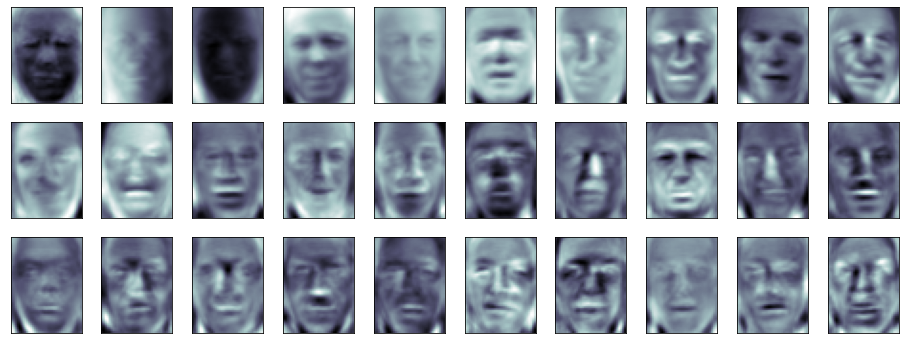

In [17]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [18]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(862, 150)
(426, 150)


### P1.2

In [19]:
my_clf_uniform.fit(X_train_pca, y_train)
my_clf_inverse_distance.fit(X_train_pca, y_train)
my_clf_gaussian.fit(X_train_pca, y_train)

In [20]:
y_pred  = my_clf_uniform.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_uniform.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.9176334106728539
test accuracy: 0.6291079812206573


In [21]:
y_pred  = my_clf_inverse_distance.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_inverse_distance.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 1.0
test accuracy: 0.6291079812206573


In [22]:
y_pred  = my_clf_gaussian.predict(X_train_pca)
print(f'train accuracy: {accuracy(y_train, y_pred)}')
y_pred = my_clf_gaussian.predict(X_test_pca)
print(f'test accuracy: {accuracy(y_test, y_pred)}')

train accuracy: 0.9176334106728539
test accuracy: 0.6291079812206573


### P1.3

100% (50 of 50) |########################| Elapsed Time: 0:16:22 Time:  0:16:22
100% (50 of 50) |########################| Elapsed Time: 0:16:26 Time:  0:16:26
100% (50 of 50) |########################| Elapsed Time: 0:17:02 Time:  0:17:02


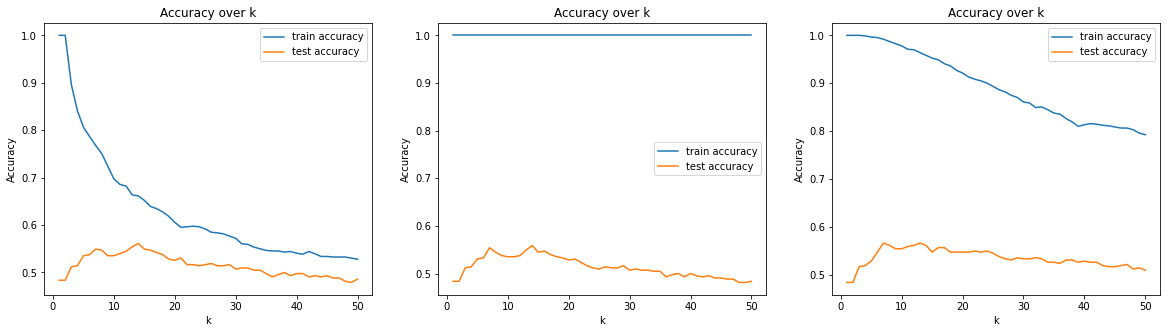

In [23]:
stack_accuracy_over_k(X_train, y_train, X_test, y_test)

100% (50 of 50) |########################| Elapsed Time: 0:15:45 Time:  0:15:45
100% (50 of 50) |########################| Elapsed Time: 0:15:50 Time:  0:15:50
100% (50 of 50) |########################| Elapsed Time: 0:15:48 Time:  0:15:48


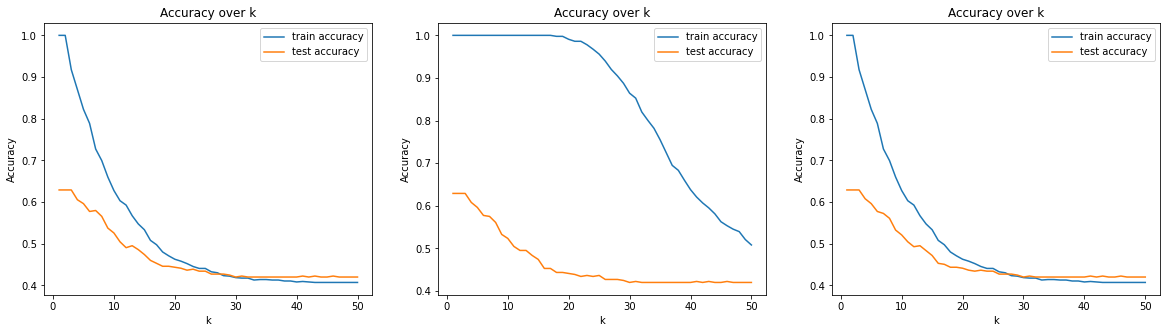

In [24]:
stack_accuracy_over_k(X_train_pca, y_train, X_test_pca, y_test)

### Qualitative comparison

Run the code provided to plot the query and corresponding k nearest neighbor images, obtained using different features (intensity values and eigenfaces). The queries are randomly chosen from the training and testing samples.

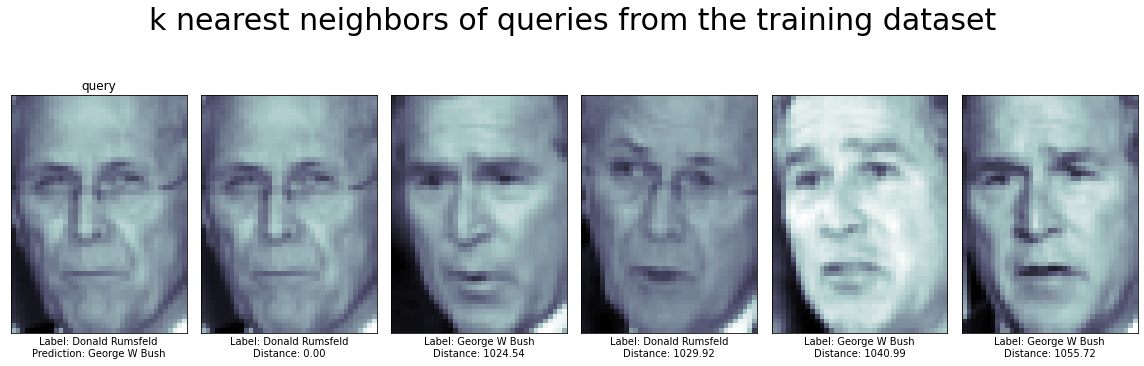

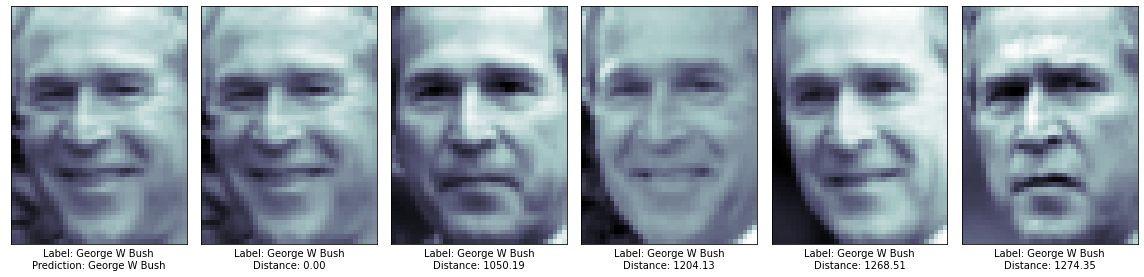

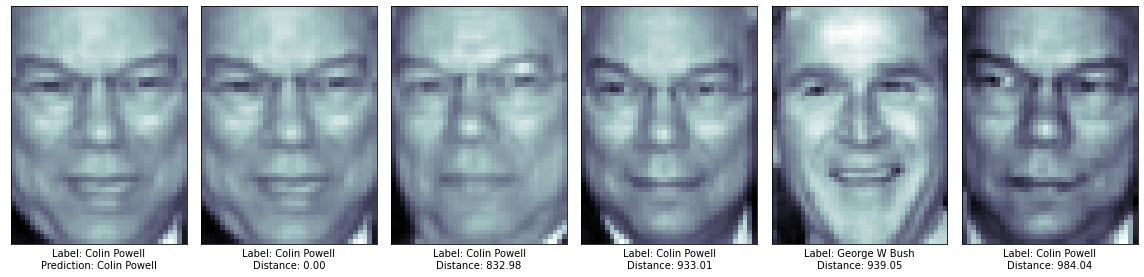

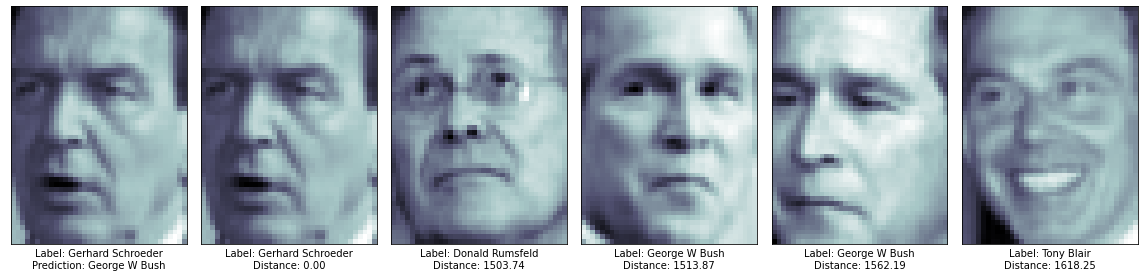

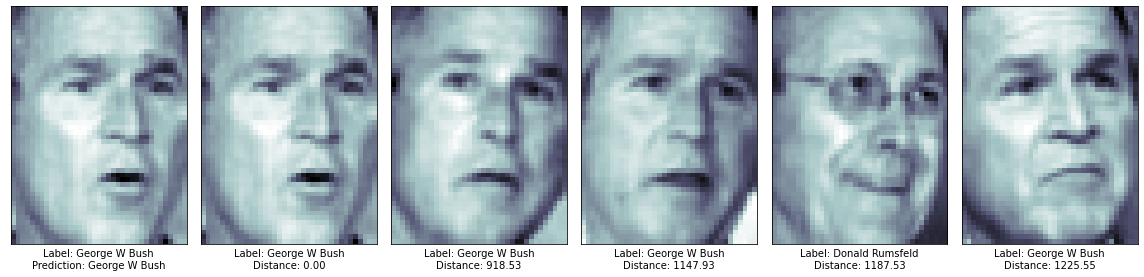

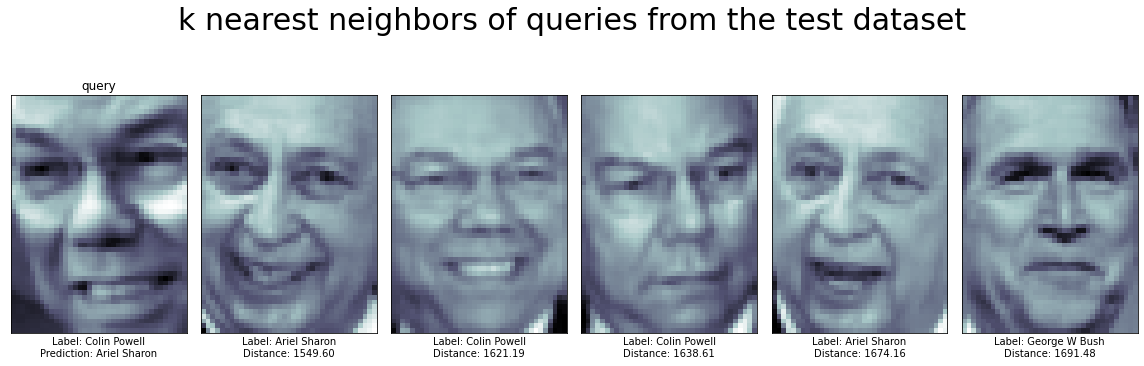

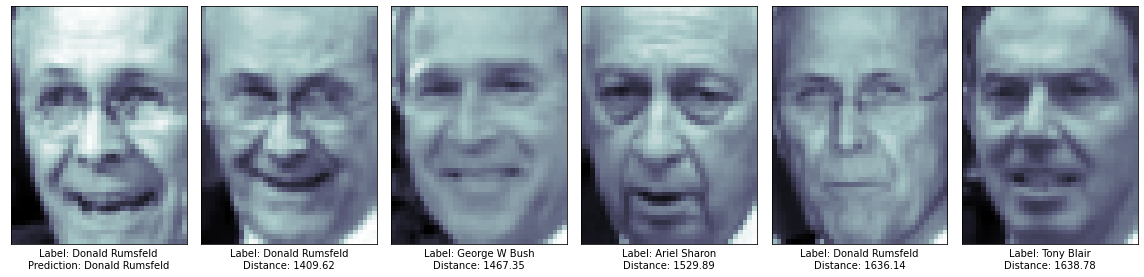

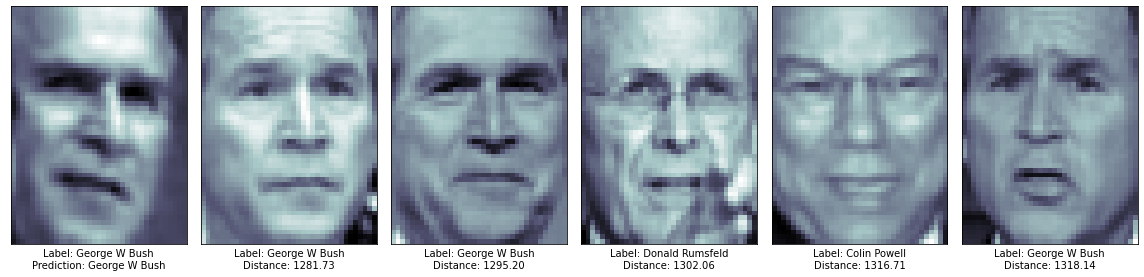

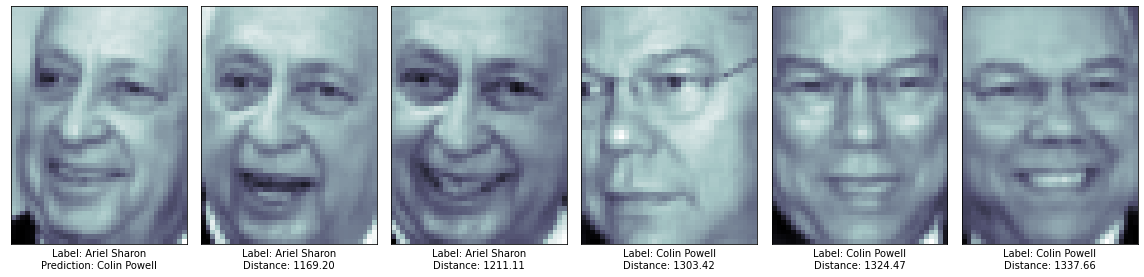

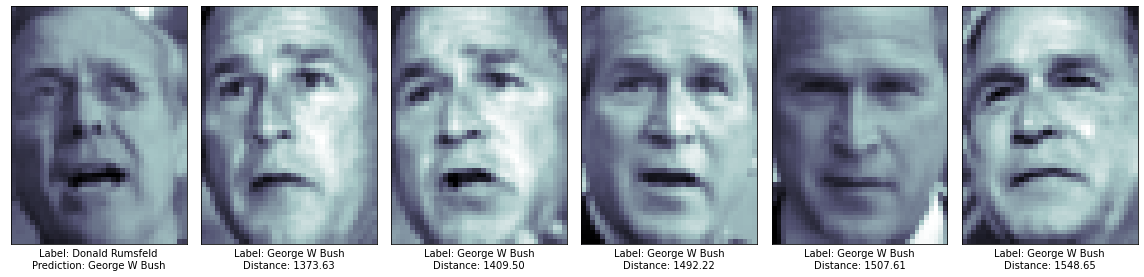

In [25]:
knn_query(X_train, X_test, X_train_image, X_test_image, y_train, y_test, name, n_neighbors=5, n_queries=5)

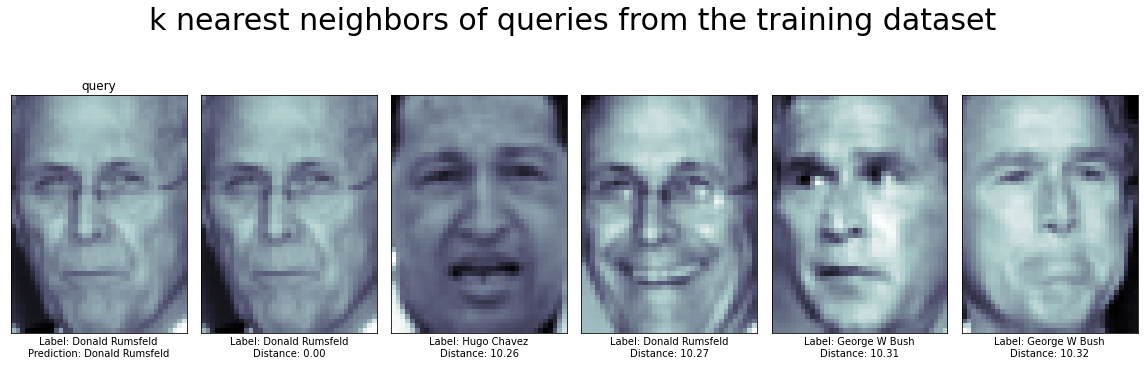

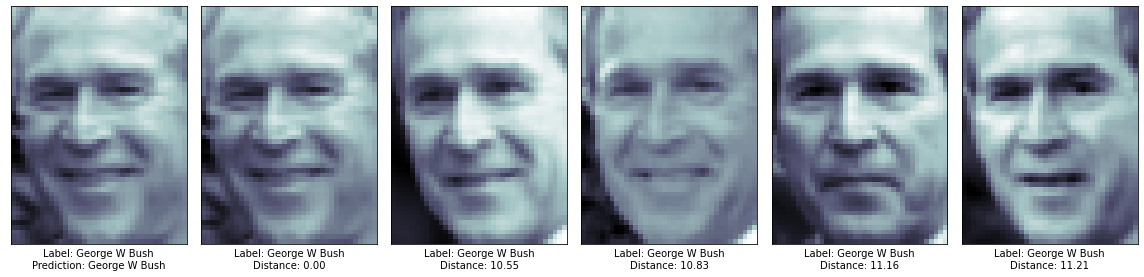

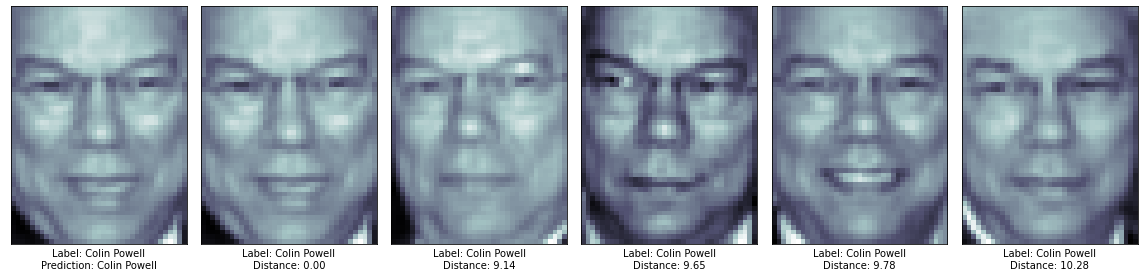

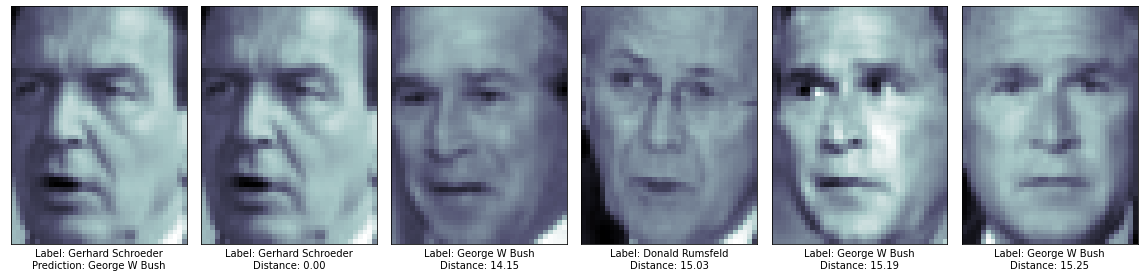

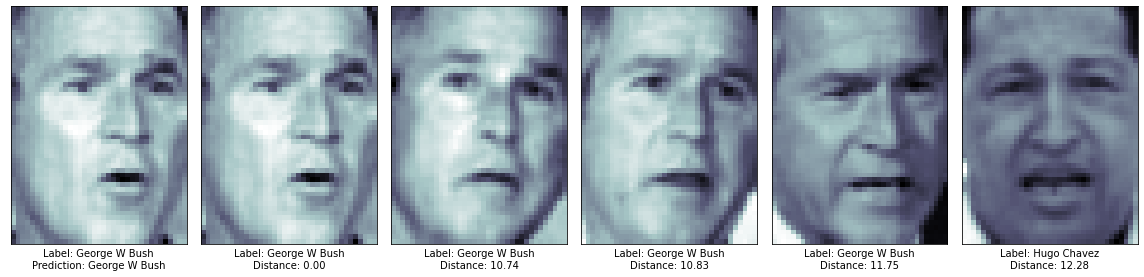

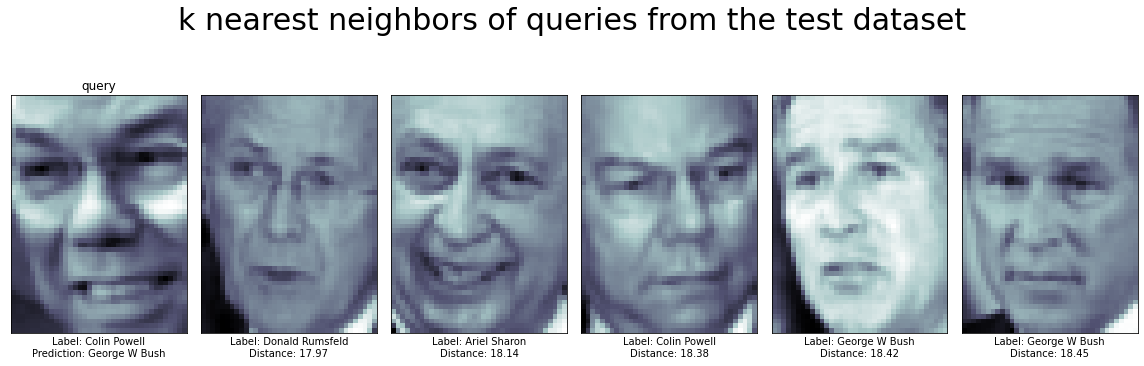

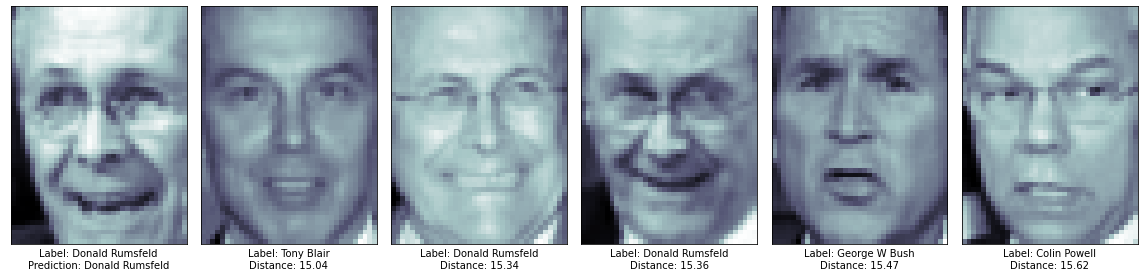

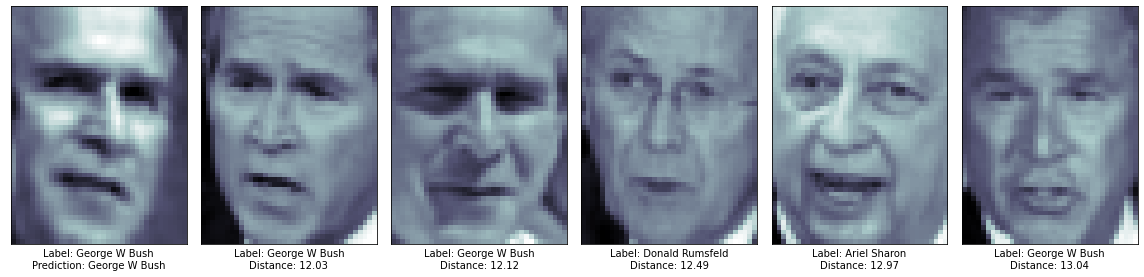

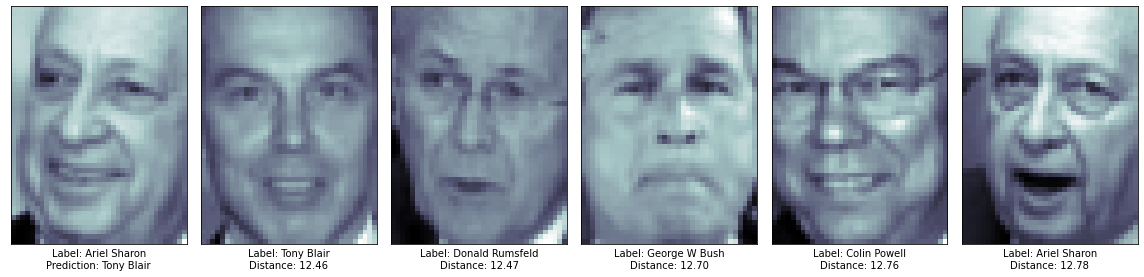

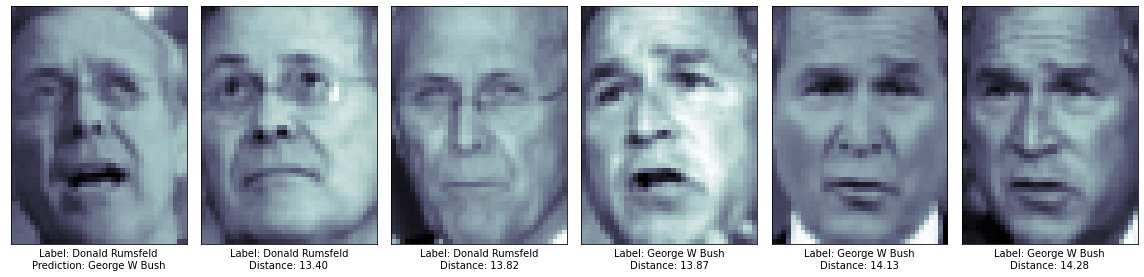

In [26]:
knn_query(X_train_pca, X_test_pca, X_train_image, X_test_image, y_train, y_test, name, n_neighbors=5, n_queries=5)

## Analysis and discussion (20 points)

Your answer must include.....

- Explanation of your implementation of a K-NN classifier method
- Comparison of results for kernel functions
- The optimal choice of *k*
- Model-based learning vs Instance-based learning
- Analysis of the results from P1
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

---

### K-NN Classifier Implementation

#### 1. Fitting
K-NN Classifier does not need a special fitting process. The process is finished by simply saving the training data. This is because, processing the data can start only after input data to be classified is given.

#### 2. Classifying
##### 1) Finiding Neighbors

When the data to be predicted is given, the model can start processing data. It starts by finding the closest k number of neighbors for each input data from training data(which was saved during fitting process). Each input data is handled one by one. It first picks a set(from input data) and starts calculating euclidean distance from each sample in training data. Each distance is recorded in 'diff' array. Then, we sort the array and finds the closest n_neighbors number of samples. argsort() function does this job. It returns the 'index' of closest n_neighbor samples. We record the dist from each samples using diff[idx]. As mentioned, this process is repeated for all sets in input data.

Note that there are two methods to find the closest samples implemented. First method is the way explained above. It records all the distance calculated and then finds the closest n_neighbors. Another method(which is commented) starts by first recording the distance of 'first' n_neighbors in the sample. Then, distances of other samples are calculated and compared one by one with the previous n_neighbors. If the new sample's distance is not closer than any of the previous n_neighbors, it moves on to the next sample. If the new sample's distance is closer than any of the previous n_neighbors, it pushes the a sample with the longest distance in the previous n_neighbors and the new one is stored. By this method, we can again find the closest n_neighbors. Note that the first method was chosen because of better speed.

##### 2) Finding Weights

Now, we have to make weights for each n_neighbor samples found. It is done in make_weight function. There are three ways to find weights.

The first way is 'uniform'. It gives equal weights to all n_neighbor samples. Therefore, it return an array with the same size of 'dist' array filled with '1's.

The second way is 'inverse distance'. It calculates the inverse of each distance against the samples. Note that if the distance is zero(which means that the input data is equal to the sample found in training data), the weight is set to 1, not infinity.

The third way is calculating the Gaussian. It passes the distance to Gaussian Kernel, with function like $\mathcal{K}(d, \lambda) = e^{\frac{-d^2}{\lambda}} $, $d$ is the distance, $\lambda$ is the parameter for the Gaussian.

The calculated weights are returned.

##### 3) Voting for an anwer

Now the model finds the anwer by voting. It starts by making an empty dictionary. Then, for each sample's y value is searched in the dictionary (as a key). When it is found, it returns the found value. If it is not found, it returns 0. Then, we add the weight for the sample and stores it back to the dictionary. After all samples are done voting, we find the key with the highest value from the dictionary. The key is returned as the predicted anwer. Note that this process is done in most_common_value method.



### Compaing Kernel Functions

Different kinds of kernel functions were used to make weights. 'uniform' weights give equal weights to all n_neighbor samples regardless of the distance. In contrary, 'inverse distance' and 'gaussian' weights give bigger weights to closer sampels and smaller weights to samples far away.

We can first see that the test accuracies did not show much difference in P1.1. The three models all showed accuracy of about 0.51. The test accuracies did not differ much in P1.2. It is because we are applying kernel functions to samples that were already sampled once by using k-NN. Since they are chosen as 'close samples', their distances against the test data did not differ much, making small differences in weights. As a result, using different kernel functions did not improve test accuracy much. 

On the other hand, train accuracy showed very different results when various kernel functions were used. It is because of the identical sample in the training data. Note that we can find an identical sample in the trained data in the model for each sample when we predict using training data. As a result, the identical sample gives very small distance, resulting a very big weight. As a result, the voting result follows the y_value of the identical sample, which obviously gives a correct prediction. Therefore, when we use kernel functions that consider distances, it gave better train accuracy.

When n_neighbors increase, weights become more important. Recall weights did not make big influence in prediction results when n_neighbors were small. It was because the chosen ones were equally close to the target sample, making similar weights no matter which weight method was used. However, if n_neighbors increase, the samples that are far away from the target sample will be chosen. Now, distances will differ much between chosen samples. As a result, giving smaller weights to samples far away changes the predictions compared to uniform weighting.

We can see this difference in P1.3. When n_neighbors increase, train accuracy drops immediately when uniform weights are used. When inverse distance weights or gaussian weights are used, train accuracy does not drop. Test Accuracy showed differences too. We can see that test accuracy was higher when gaussian weights or inverse distnace weights were used.

Note that when eigen faces were used, train accuracy dropped when n_neighbors increased although inverse distance weights of gaussian weights were used. It is because the over distances among samples were much smaller that original images. In Qualitative Comparison Part, distances among different original images are shown to be near 1000. Distances among eigen faces were around 10. As a result, the weight for the identical image was not as powerful as before. Now, when there are enough n_neighbors, other images can overcome this barrier and make a wrong prediction (for training data).

In [27]:
values = dict()
for y in y_train:
    prev = values.get(y, 0)
    values[y] = prev + 1
    
for i in range(7):
    print(f"{name[i]} {values[i]}")

Ariel Sharon 56
Colin Powell 157
Donald Rumsfeld 83
George W Bush 351
Gerhard Schroeder 76
Hugo Chavez 48
Tony Blair 91


I also found that the training data was not uniform. There were much more samples of George W Bush (351), compared to Hugo Chavez (48). As a result, when big n_neighbors are used, images of George W Bush were selected too much, giving too much votes for him (although he is not close!!). This resulted many wrong predictions that says the image is 'George W Bush'.

*Look 'Qualitative Comparison' Section. For Donald Rumsfield, the image was predicted to be 'George W. Bush'. There were 2 images of "George W. Bush" chosen to be neighbors. In contrast, when an image of George W. Bush was given to be predicted, all 5 images chosed as neighbors were images of President Bush. This shows what happens when there are too many images of a particular person in the dataset, and the bias wasn't regularized. To fix this problem, we may need to implement a technique that can adjust weights considering the number of images in the training data.*

### Optimal choice of K

In KNN classifier, k determines the complexity of the model. This implies that depending on k, the model can overfit or underfit to the model. 

When k is too small, the model can easily overfit to training data. As a result, it becomes too sensitive to noise. This is shown in Accuracy over k graph, which plots how test accuracy increases as k increases at first. 

When k is too large, the model can be underfitted. Because it selects too many samples from train data as neighbors, the model becomes too unsensitive to data. This is what happened in P1.3 when bigger k was useed. No matter what given as input data, there were too many George W Bush selected as neighbors, making incorrect predictions. 

As a result, we need to find the optimal choice of K considering the number of training samples. We need k that includes enough samples so that it can overcome noise, but does not include too many samples that the model does not distinguish different input data. For our training data, about 3~6 was the best choice.

### Model-based learning vs Instance-based learning

Previous predicting methods generated a model using training data. When training data was given to the model, the model generated a specific model by calculating parameters from given data. After the calculation was finished, it disposed the data and only stored the result of calculation. The prediction was done by only using the stored calculation results. This is a Model-Base learning, which uses 'model's generated from training data.

The K-NN Classifier here does not make a unqie model from training data. When training data is given to the model, it saves the entire data in the model. The calulcation is mostly done when target data is given. This is because K-NN Classifier is an Instance-Based Learning.

These differences results give some unique characteristics.

First, Model-based learning needs much more time for 'fitting'. As mentioned above, model-based learning needs to calculate parameters from the training data. Therefore, we need some time for the model to calulcate these parameters. However, Instance-based learning does not need any kind of calculation for 'fitting'. All it needs to do is save the data. As a result, the K-NN model was able to finish 'fitting' process in very short time. (We were able to replace the training data of the model very easily too. Using this characteristic, we can make a model that easily updates the training data when new samples are available.)

Second, Model-based learning needs much smaller time in predicting. Since training data is calculated and parameters for predicting are prepared, predicting process can be finished much faster. On the other hand, Instance-based learning starts calculation with training data in 'prediction' stage. Therefore, it needs much more time in comparing and calculation for prediction. As a result, K-NN model needed very long time to get predictions.

Third, Model-based learining needs much smaller memory. Recall that Model-based learning only needs calculated pararmeters. Training data does not need to be stored after parameters are calculated. However, Instance-based learning needs to store all the training data. Therefore, Instance-based learning needs much more memory to store the model it self.

### Analysis of the results from P1

#### Comparing Intensity and EigenVectors

Intensity values aren't a very good choice to directly use in K-NN models. We need to convert the original (intensity) data that can properly express the characteristics of the data. One example is 'eigenface'.

In P1.2, eigenfaces for training data and test data was generated and used in predictions. As result, test accuracy increase from 0.5 to around 0.62. From this improvement, we can see that converting intensity values to other formats that expresses the true characteristics of the data gives better results for K-NN classifiers.


##### Other analysis for the results from P1 were done above, while discussing characteristics of K-NN and techniques used.